#### Ε.Μ.Π. Σχολή Η.Μ.& Μ.Υ. Ψηφιακή Επεξεργασία Σημάτων Ακαδ.Ετος 2019-2020
                        1η Εργαστηριακή Άσκηση  

##### Εισαγωγή στην Ψηφιακή Επεξεργασία Σημάτων με Python και Εφαρμογές σε Ακουστικά Σήματα

Η εργασία παραδίδεται από τους φοιτητές:
    
* **Γαρδέλης Παναγιώτης       ΑΜ: 03117008**
* **Τσιγγέλης Κωνσταντίνος    ΑΜ: 03117149**

###### Μέρος 1ο - Σύστημα Εντοπισμού Τηλεφωνικών Τόνων (Telephone Touch –Tones)

1.1

In [1]:
import numpy as np
import scipy as sp
import librosa.output as libr
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd

In [2]:
n=np.linspace(1, 1001, 1000)
d0=np.sin(0.7217*n)+np.sin(1.0247*n)#Prefer that way cause of O(n) complexity
d1=np.sin(0.5346*n)+np.sin(0.9273*n)#Otherwise it would be two nested for loops
d2=np.sin(0.5346*n)+np.sin(1.0247*n)#Which translates to O(n^2)
d3=np.sin(0.5346*n)+np.sin(1.1328*n)
d4=np.sin(0.5906*n)+np.sin(0.9273*n)
d5=np.sin(0.5906*n)+np.sin(1.0247*n)
d6=np.sin(0.5906*n)+np.sin(1.1328*n)
d7=np.sin(0.6535*n)+np.sin(0.9273*n)
d8=np.sin(0.6535*n)+np.sin(1.0247*n)
d9=np.sin(0.6535*n)+np.sin(1.1328*n)
sd.play(d0,8192)
#sd.play(d1,8192)
#sd.play(d7,8192)

1.2

Text(0.5, 1.0, 'DFT of d4')

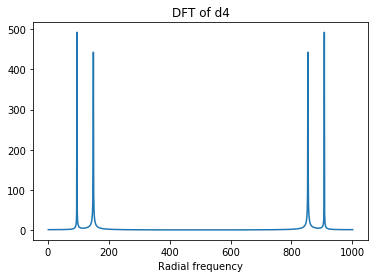

In [3]:
%matplotlib inline
Dftd4=np.fft.fft(d4)
Dftd6=np.fft.fft(d6) #we computed the DFT of the signal d4[n]
plt.plot(n, np.abs(Dftd4))
plt.xlabel('Radial frequency')
plt.title('DFT of d4')

Text(0.5, 1.0, 'DFT of d6')

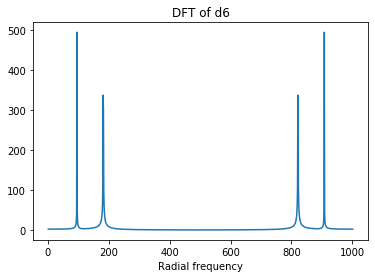

In [4]:
%matplotlib inline
Dftd4=np.fft.fft(d4)
Dftd6=np.fft.fft(d6) #we computed the DFT of the signal d6[n]
plt.plot(n, np.abs(Dftd6))
plt.xlabel('Radial frequency')
plt.title('DFT of d6')

1.3

In [5]:
sum_of_records = [0, 6, 2, 3, 4, 0, 5, 5]
dig_array=np.empty(10,dtype=object)
dig_array[0]=np.sin(0.7217*n)+np.sin(1.0247*n)#Prefer that way cause of O(n) complexity
dig_array[1]=np.sin(0.5346*n)+np.sin(0.9273*n)#Otherwise it would be two nested for loops
dig_array[2]=np.sin(0.5346*n)+np.sin(1.0247*n)#Which translates to O(n^2)
dig_array[3]=np.sin(0.5346*n)+np.sin(1.1328*n)
dig_array[4]=np.sin(0.5906*n)+np.sin(0.9273*n)
dig_array[5]=np.sin(0.5906*n)+np.sin(1.0247*n)
dig_array[6]=np.sin(0.5906*n)+np.sin(1.1328*n)
dig_array[7]=np.sin(0.6535*n)+np.sin(0.9273*n)
dig_array[8]=np.sin(0.6535*n)+np.sin(1.0247*n)
dig_array[9]=np.sin(0.6535*n)+np.sin(1.1328*n)
outputsig = np.empty(0)
for i in sum_of_records:
    outputsig = np.concatenate((outputsig, dig_array[i]))
    outputsig = np.concatenate(((outputsig, np.zeros(100))))
sd.play(outputsig, 8192)
libr.write_wav("tone_sequence.wav", outputsig, 8192)

1.4

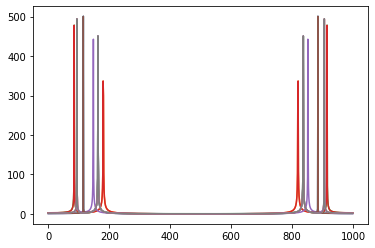

In [6]:
from scipy import signal 
rect = signal.boxcar(1000) #square/rect windows
len_rect=len(rect)
lengthsig=len(outputsig)
rect_windows=np.array([outputsig[i:(i+len_rect)]*rect[:] for i in range(0, lengthsig, 100+len_rect)]) #ignore the 100 zero samples between the digits
rect_windows = np.array([np.fft.fft(rect_windows[i]) for i in range(8)]) #The number of tones of the signal is 8

for i in range(8) :
    #plt.subplot(4, 2, i + 1) #This plots the winodowed signals in seperate graphs
    plt.plot(abs(rect_windows[i]))

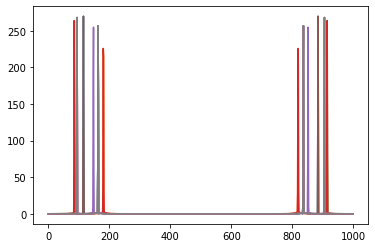

In [7]:
from scipy import signal 
hamm = signal.hamming(1000)  #hamming windows
len_hamm=len(hamm)
hamm_windows=np.array([outputsig[i:(i+len_hamm)]*hamm[:] for i in range(0, lengthsig, 100+len_hamm)]) #ignore the 100 zero samples between the digits
hamm_windows = np.array([np.fft.fft(hamm_windows[i]) for i in range(8)]) #The number of tones of the signal is 8

for i in range(8) :
    #plt.subplot(4, 2, i + 1) #This plots the winodowed signals in seperate graphs
    plt.plot(abs(hamm_windows[i]))

1.5

In [8]:
from numpy import  diff,mean,nonzero #function that estimates frequency of a signal by counting zero crossings
def freq_from_crossings(sig, fs):  #divides average period by time to get frequency
                                 #found this function at https://gist.github.com/endolith/255291
    
    
  
     #Find all indices right before a rising-edge zero crossing
    indices = nonzero((sig[1:] >= 0) & (sig[:-1] < 0))[0]

     #Naive (Measures 1000.185 Hz for 1000 Hz, for instance)
     #crossings = indices

    # More accurate, using linear interpolation to find intersample
    # zero-crossings (Measures 1000.000129 Hz for 1000 Hz, for instance)
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]

    # Some other interpolation based on neighboring points might be better.
    # Spline, cubic, whatever

    return fs / mean(diff(crossings))

In [9]:
list=np.zeros((10,2))
n=np.linspace(1, 1001, 1000)

columns=np.array([0.9273,1.0247,1.1328])
columns_sin=np.array([np.sin(i*n) for i in columns])


rows=np.array([0.5346,0.5906,0.6535,0.7217])
rows_sin=np.array([np.sin(i*n) for i in rows])

d01=round((freq_from_crossings(rows_sin[3],8192)/8.2),0)
d02=round((freq_from_crossings(columns_sin[1],8192)/8.2),0)
list[0]=np.array([d01,d02])           

for i in range(3):
    for j in range(3):
        list[3*i + j + 1][0]=round((freq_from_crossings(rows_sin[i],8192)/8.2),0)

        list[3*j + i + 1][1]=round((freq_from_crossings(columns_sin[i],8192)/8.2),0)

for i in range(np.shape(list)[0]):
        print("The coordinates of the peak of the digit", i, "are:", int (list[i][0]), int (list[i][1]))

The coordinates of the peak of the digit 0 are: 115 163
The coordinates of the peak of the digit 1 are: 85 148
The coordinates of the peak of the digit 2 are: 85 163
The coordinates of the peak of the digit 3 are: 85 180
The coordinates of the peak of the digit 4 are: 94 148
The coordinates of the peak of the digit 5 are: 94 163
The coordinates of the peak of the digit 6 are: 94 180
The coordinates of the peak of the digit 7 are: 104 148
The coordinates of the peak of the digit 8 are: 104 163
The coordinates of the peak of the digit 9 are: 104 180


1.6

In [10]:
def windowing_and_fourier (signIn) :
    sound=signIn[signIn!=0]
    length_of_digit = np.size(sound)
    all_digits_are = length_of_digit // 1000 #since each sound is a 1000 samples
    window = np.empty(all_digits_are, dtype = object)
    for i in range(0, length_of_digit, 1000) :
        window[i // 1000] = sound[i : (i+1000)] #with step 1000 we get the whole sound of a digit
    window = np.array([np.abs(np.fft.fft(x)) for x in window]) #calculate dft
    return window

In [11]:
def ttdecode(signIn) : 
    out = []
    window = windowing_and_fourier(signIn)
    for x in window :
        length_of_list = np.shape(list)[0] 
        peaks = sp.signal.find_peaks(x, height = 100)[0] #Max energy for max abs(Dft)
        store_first_peaks = np.array([peaks[0], peaks[1]])
        for i in range(length_of_list) :
            if np.array_equal(store_first_peaks, list[i]) : out.append(i) #push the digit in the output if it matches
    for x in out : print(x, end = " ")
    print("\n")
    return
print("The digits of the sum of our student records are:", end = " ")
ttdecode(outputsig)

The digits of the sum of our student records are: 0 6 2 3 4 0 5 5 



1.7

In [12]:
easySig = np.load("easySig.npy")
hardSig = np.load("hardSig.npy")
print("The digits of easySig are:", end = " ")
ttdecode(easySig)
print("The digits of hardSig are:", end = " ")
ttdecode(hardSig)

The digits of easySig are: 1 3 2 6 3 9 0 0 

The digits of hardSig are: 9 0 9 6 3 2 1 1 9 1 



##### Μέρος 2ο - Φασματική Ανάλυση Ημιτονοειδών και Ανίχνευση Απότομων Μεταβάσεων με τον Μετ/σμό Fourier Βραχέος Χρόνου (STFT) και τον                                Μετ/σμό Wavelets (διακριτοποιημένο CWT)

2.1

In [13]:
import numpy as np
import scipy as sp
import librosa.output as libr
import librosa.core as lbc
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd

(a)

Text(0.5, 1.0, 'Plot of xn')

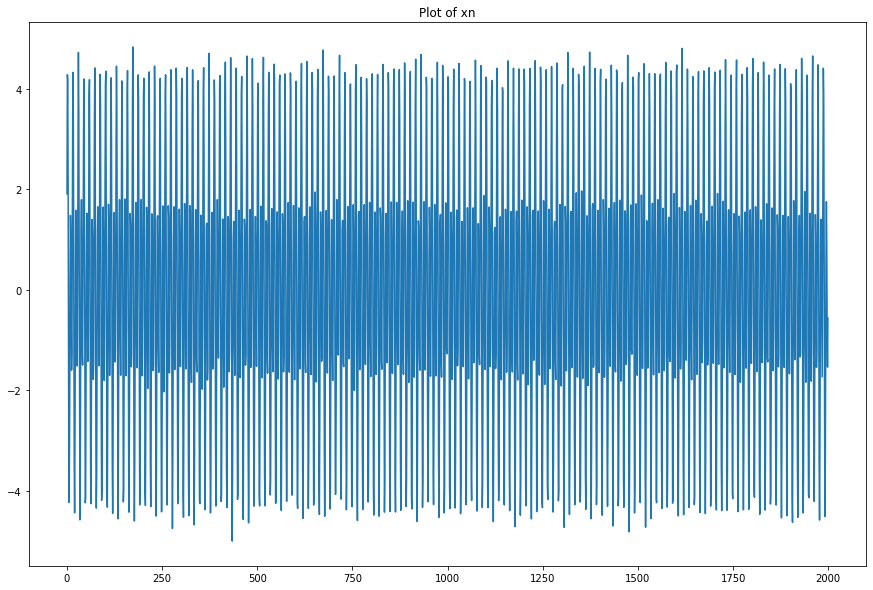

In [14]:
Ts=0.001 #Ts=1/Fs
n=np.arange(2000) #linspace(0,2000,2000) works equally fine.
xn=2*np.cos(2*np.pi*70*n*Ts)+3*np.sin(2*np.pi*140*n*Ts)+0.15*np.random.normal(0,1,2000)
plt.figure(figsize=(15,10))
plt.plot(n,xn)
plt.title('Plot of xn')

(b)

In [15]:
shortransform=lbc.stft(xn, 2048, 20, 40) #Fs=1000Hz thus hop_length=0.02*1000 and win_length=0.04*1000
#default # of samples=2048

#In order to have the proper time and frequency values, we use print_scale, just like in the e-lectures
print(shortransform.shape) #stft outputs t=function(f) (y_axis=f, x_axis=t)

(1025, 101)


Text(0.5, 1.0, 'STFT of the signal shortransform')

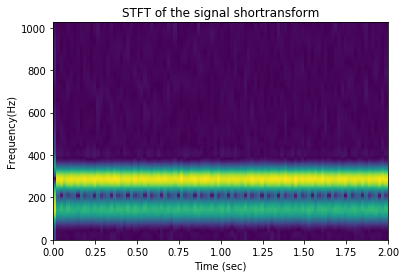

In [16]:
%matplotlib inline  
#sampling at [0, 2]
t=np.linspace(0,2,101) #22050 is the default librosa sample rate
f=np.linspace(0,1025,1025) 
plt.pcolormesh(t,f,abs(shortransform))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the signal shortransform')

(c)

In [17]:
s = np.power(2,np.linspace(1,6,1000)) 
coefs,freqs = pywt.cwt(xn,s,'cmor3.0-1.0')
print(coefs.shape)
#print(freqs)

(1000, 2000)


Text(0.5, 1.0, '|CWT(t,f)| of the signal segment')

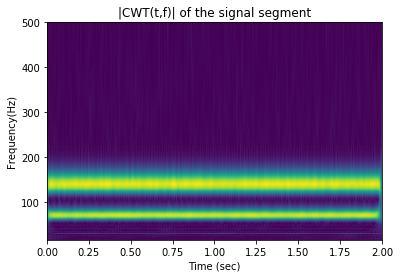

In [18]:
%matplotlib inline
t = np.linspace(0,2,2000)
f = freqs*1000
#f=f[f>15.625]
#print(f)
plt.pcolormesh(t,f,np.abs(coefs))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('|CWT(t,f)| of the signal segment')

Text(0.5, 1.0, '|CWT(t,s)| of the signal segment')

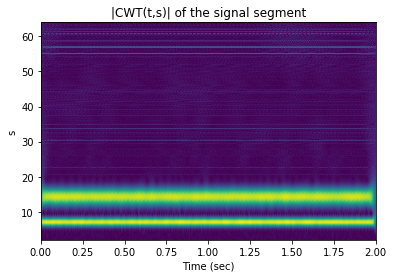

In [26]:
%matplotlib inline
t = np.linspace(0,2,2000)
f = freqs*1000
#f=f[f>15.625]
#print(f)
plt.pcolormesh(t,s,np.abs(coefs))
plt.xlabel('Time (sec)')
plt.ylabel('s')
plt.title('|CWT(t,s)| of the signal segment')

(d)

Ο μετασχηματισμός των Wavelets έχει υψηλότερη ανάλυση στο χρόνο καθώς οι συχνότητες αυξάνονται και, αντίστοιχα, υψηλότερη ανάλυση στο πεδίο της συχνότητας για σήματα που διαρκούν περισσότερο από άλλα. Επίσης, οι DT-CWT δείχνουν να "μοιάζουν" με τον STFT.

2.2

(a)

Text(0.5, 1.0, 'Plot of newxn')

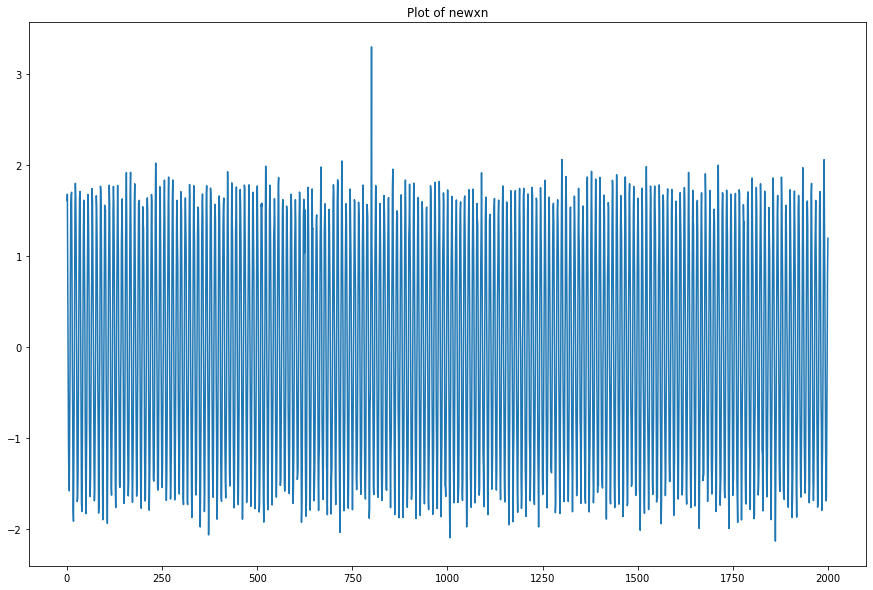

In [19]:
Ts=0.001
newn = np.linspace(0,2000,2000)
newxn = 1.7*np.cos(2*np.pi*90*n*Ts) + 0.15*np.random.normal(0,1,2000) + 1.7*sp.signal.unit_impulse(2000, 625)+1.7*sp.signal.unit_impulse(2000, 800)
plt.figure(figsize=(15,10))
plt.plot(newn, newxn)
plt.title('Plot of newxn')

(b)

In [20]:
newshortransform=lbc.stft(newxn, 2048, 20, 40) 
print(newshortransform.shape)

(1025, 101)


Text(0.5, 1.0, 'STFT of the signal shortransform')

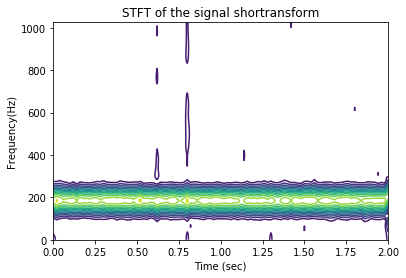

In [21]:
%matplotlib inline
newt=np.linspace(0,2,101) #100000/22050 is the default librosa sample rate
newf=np.linspace(0,1025,1025) #11025 
plt.contour(newt,newf,abs(newshortransform),15)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the signal shortransform')

(c)

In [22]:
s = np.power(2,np.linspace(1,6,1000))
coefs,freqs = pywt.cwt(newxn,s,'cmor3.0-1.0')
print(coefs.shape)
#print(freqs)

(1000, 2000)


Text(0.5, 1.0, '|CWT(t,f)| of the signal segment')

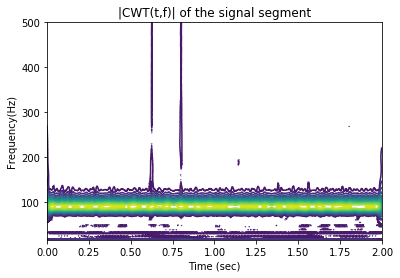

In [23]:
%matplotlib inline
newt = np.linspace(0,2,2000) #2000/22050
newf = freqs*1000
#newf=newf[newf>15.625]
#print(f)
plt.contour(newt,newf,np.abs(coefs),15)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('|CWT(t,f)| of the signal segment')

Text(0.5, 1.0, '|CWT(t,s)| of the signal segment')

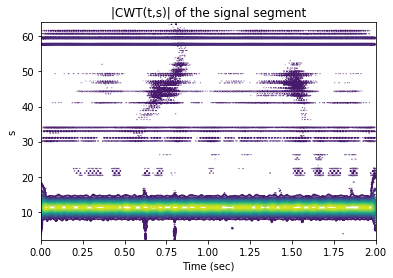

In [24]:
%matplotlib inline
newt = np.linspace(0,2,2000) #2000/22050
newf = freqs*1000
#newf=newf[newf>15.625]
#print(f)
plt.contour(newt,s,np.abs(coefs),15)
plt.xlabel('Time (sec)')
plt.ylabel('s')
plt.title('|CWT(t,s)| of the signal segment')

(d)

Εδώ είναι ξεκάθαρες οι αποκλίσεις-παράσιτα των DT-CWT σε σχέση με τον STFT. 

##### Μέρος 3ο - Χαρακτηριστικά Βραχέος Χρόνου Σημάτων Φωνής και Μουσικής (Ενέργεια και Ρυθμός Εναλλαγής Προσήμου)

3.1

In [25]:
def short_time_energy_and_crossing_rate_of(signal):
    window_length=np.array([20,21,22,23,24,25,26,27,28,29,30])
    for i in window_length:
        hamming_window=np.hamming(i*16)
        squared_signal=signal**2
        Energy=np.convolve(hamming_window, squared_signal)
            
        shift_right_logical=np.zeros(1)
        sign_of_number=np.concatenate((signal,shift_right_logical)) #We put a zero here as well cause we can't subtract arrays of different lengths
        sign_of_previous_number=np.concatenate((shift_right_logical,signal))
        diff_of_signs=np.abs(np.sign(sign_of_number)-np.sign(sign_of_previous_number))
        ZeroCrossRate=np.convolve(hamming_window, diff_of_signs)
        #print(ZeroCrossRate)
    plt.subplot (2,1,1)
    plt.plot(Energy)
    plt.subplot (2,1,2)
    plt.plot(ZeroCrossRate)
    return(Energy, ZeroCrossRate)
    return

Energy and Zero Crossing Rate respectively are (array([9.47980370e-07, 2.13377964e-06, 2.98903230e-06, ...,
       1.73321204e-06, 6.95253839e-07, 0.00000000e+00]), array([0.08      , 0.08003957, 0.08015829, ..., 0.08003957, 0.08      ,
       0.        ]))


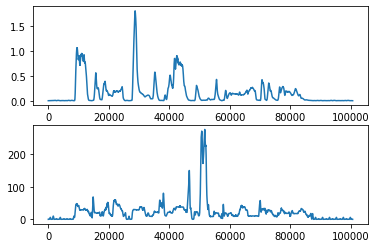

In [26]:
firstwav, Fs = lbc.load('speech_utterance.wav') #by default samplerate=22050

print("Energy and Zero Crossing Rate respectively are {}".format(short_time_energy_and_crossing_rate_of(firstwav)))

3.2

Energy and Zero Crossing Rate respectively are (array([4.65629091e-12, 7.69074907e-12, 9.50330674e-12, ...,
       1.97849079e-09, 7.05785944e-10, 1.08677547e-10]), array([0.08      , 0.08003957, 0.24015829, ..., 0.08015829, 0.08003957,
       0.08      ]))


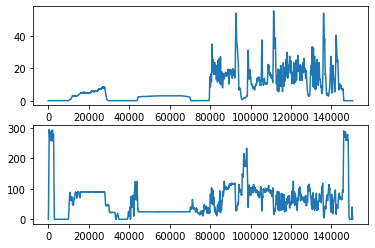

In [27]:
secondwav, Fs = lbc.load('music.wav')
print("Energy and Zero Crossing Rate respectively are {}".format(short_time_energy_and_crossing_rate_of(secondwav)))

Από τα παραπάνω διαγράμματα καθίσταται σαφές ότι για μεγαλύτερο μήκος παραθύρου οι ενέργειες βραχέος χρόνου υπολείπονται σε ακρίβεια. Όσον αφορά τη δυνατότητά μας να ξεχωρίσουμε φωνή(έμφωνους) από σιωπή (άφωνους ήχους), δεδομένου ότι οι έμφωνοι χαρακτήρες είναι περιοδικοί και μεγάλου πλάτους-σε αντίθεση με τους άφωνους που είναι απεριοδικοί-δεν μπορούμε να αποφανθούμε με ακρίβεια. Ο λευκός θόρυβος Gauss καθιστά τα σημεία σιγής να μειώσουν το Zero Crossing Rate τους- το οποίο ειδάλλως είναι ιδιαίτερα υψηλό-διατηρώντας παράλληλα τη χαμηλή ενέργειά τους. Το γεγονός αυτό σε συνδυασμό με το χαμηλό ρυθμό εναλλαγής προσήμου και τη μεγάλη ενέργεια βραχέος χρόνου των έμφωνων δεν μας επιτρέπει να βγάλουμε βέβαιο συμπέρασμα.